In [86]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
%matplotlib inline
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
#files.upload('Training_dataset.xlsx')
#!rm Training_dataset.xlsx
#!rm Validation_dataset.csv

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Training_dataset.xlsx to Training_dataset (2).xlsx
User uploaded file "Training_dataset.xlsx" with length 33489 bytes


In [88]:
df = pd.read_excel('Training_dataset.xlsx')
df = df[pd.notnull(df['TARGET'])]
dft=pd.read_csv('/content/Book1.csv',sep=';')
dft = dft[pd.notnull(dft['TARGET'])]
print(df.head(10))
print(dft.head(10))

                                               TEXT           TARGET
0                 I want to activate my credit card  activate_card_0
1              I don't know how to activate my card  activate_card_0
2                        I want to activate my card  activate_card_0
3      Why is your activation process not working ?  activate_card_0
4                        My bank card is not active  activate_card_0
5                         I cannot activate my card  activate_card_0
6                    How can I start using my card?  activate_card_0
7                  I want to activate my debit card  activate_card_0
8              I need your help to activate my card  activate_card_0
9  Please activate my card for me, it's not working  activate_card_0
                                     TEXT                    TARGET
0          I want to use my card in Japan  use_abroad_0f_non_europe
1                    Activate card abroad              use_abroad_0
2       I want to use my card in Port

In [89]:
my_Labels = ['activate_card_0','pin_by_sms_0','get_card_limit_0','info_card_types_credit_0','order_card_0','use_abroad_0','info_charges_abroad_0','new_pin_0',
           'use_abroad_0f_non_europe','contactless_0','unblock_card_0','cards_overview_0','modify_limit_0','lost_card_0 ', 'activate_card_0','balance_0',
           'card_stop_0','use_abroad_0e_europe','new_card_reader_0','use_abroad_0a_credit','info_abroad_0','get_transaction_info_0','use_abroad_0b_debit',
           'info_CVC_CVV_0 ','order_card_0e_replacement','info_card_number_0', 'order_card_0d_extra','info_card_expiration_0 '
           
          ]

In [90]:
print(df['TEXT'].apply(lambda x: len(x.split(' '))).sum()) #number of words in the Message column before cleaning

7181


889

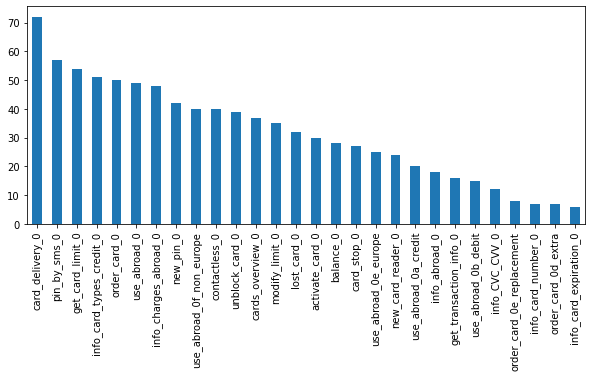

In [91]:
#training set
plt.figure(figsize=(10,4))
df.TARGET.value_counts().plot(kind='bar');
df.TARGET.size

394

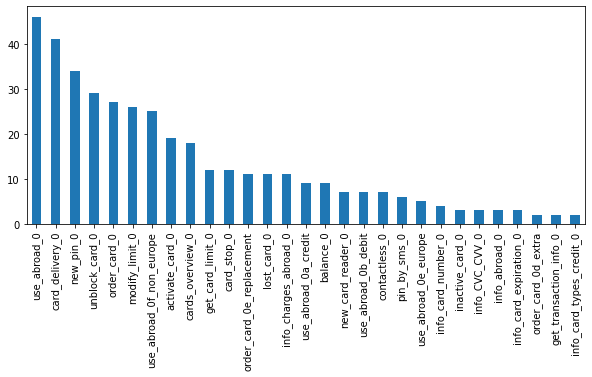

In [92]:
#test set
plt.figure(figsize=(10,4))
dft.TARGET.value_counts().plot(kind='bar');
dft.TARGET.size

In [93]:
dft = dft.replace('inactive_card_0', np.nan).dropna()
print(dft.TARGET.value_counts())
dft.TARGET.size

use_abroad_0                 46
card_delivery_0              41
new_pin_0                    34
unblock_card_0               29
order_card_0                 27
modify_limit_0               26
use_abroad_0f_non_europe     25
activate_card_0              19
cards_overview_0             18
get_card_limit_0             12
card_stop_0                  12
order_card_0e_replacement    11
lost_card_0                  11
info_charges_abroad_0        11
use_abroad_0a_credit          9
balance_0                     9
new_card_reader_0             7
use_abroad_0b_debit           7
contactless_0                 7
pin_by_sms_0                  6
use_abroad_0e_europe          5
info_card_number_0            4
info_CVC_CVV_0                3
info_abroad_0                 3
info_card_expiration_0        3
order_card_0d_extra           2
get_transaction_info_0        2
info_card_types_credit_0      2
Name: TARGET, dtype: int64


391

In [94]:
#see some text and 
def print_plot(index):
    example = df[df.index == index][['TEXT','TARGET']].values[0]
    if len(example) > 0:
        print(example[0])
        print(example[1])
print_plot(10) # you can print any Attribute here with changing the index

Do I have to do anything before I can use my card?
activate_card_0


In [95]:
#print a group of training set
for i in range(25 , 35):
  print_plot(i)
  

Do I have to do something before I can use my card?
activate_card_0
I need to activate my debit card
activate_card_0
I have to unlock my credit card
activate_card_0
I have my card, what should I do?
activate_card_0
activate card please
activate_card_0
does my account have money on it?
balance_0
do i have money?
balance_0
what is my balance
balance_0
Where can I get my card statement?
balance_0
what's my balance?
balance_0


In [96]:
'''
text cleaning step includes remove stop words,
change text to lower case, remove punctuation, remove bad characters, and so on.
'''
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))


def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
   
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['TEXT'] = df['TEXT'].apply(clean_text) # clean training set
dft['TEXT'] = dft['TEXT'].apply(clean_text) # clean test set
#df['AdditionalCondition'] = df['AdditionalCondition'].apply(clean_text)

print_plot(21) # just an example you can change the index print_plot(index)

help activate card
activate_card_0


In [97]:
#print a group of training set after cleaning
for i in range(25 , 35):
  print_plot(i)

something use card
activate_card_0
need activate debit card
activate_card_0
unlock credit card
activate_card_0
card
activate_card_0
activate card please
activate_card_0
account money
balance_0
money
balance_0
balance
balance_0
get card statement
balance_0
whats balance
balance_0


In [98]:
print(df['TEXT'].apply(lambda x: len(x.split(' '))).sum()) #number of words in the TEXT column After cleaning training set
print(dft['TEXT'].apply(lambda x: len(x.split(' '))).sum()) #number of words in the TEXT column After cleaning test set

3409
1598


In [99]:
X_train = df.TEXT
y_train = df.TARGET
#X_train, X_test, y_train, y_test = train_test_split(X_train,y_train , test_size=0.7, random_state = 42)
X_test = dft.TEXT
y_test = dft.TARGET

In [100]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
# Print a human readable report
print(classification_report(y_test, y_pred,target_names=my_Labels))

accuracy 0.6010230179028133
                           precision    recall  f1-score   support

          activate_card_0       0.89      0.42      0.57        19
             pin_by_sms_0       0.83      0.56      0.67         9
         get_card_limit_0       0.51      0.90      0.65        41
 info_card_types_credit_0       1.00      0.75      0.86        12
             order_card_0       0.94      0.83      0.88        18
             use_abroad_0       1.00      1.00      1.00         7
    info_charges_abroad_0       0.38      0.75      0.50        12
                new_pin_0       0.00      0.00      0.00         2
 use_abroad_0f_non_europe       0.00      0.00      0.00         3
            contactless_0       0.00      0.00      0.00         3
           unblock_card_0       0.00      0.00      0.00         3
         cards_overview_0       0.00      0.00      0.00         4
           modify_limit_0       0.10      1.00      0.18         2
             lost_card_0        0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_Labels))

accuracy 0.7340153452685422
                           precision    recall  f1-score   support

          activate_card_0       0.57      0.84      0.68        19
             pin_by_sms_0       0.89      0.89      0.89         9
         get_card_limit_0       0.70      0.85      0.77        41
 info_card_types_credit_0       1.00      0.92      0.96        12
             order_card_0       0.74      0.78      0.76        18
             use_abroad_0       1.00      1.00      1.00         7
    info_charges_abroad_0       0.44      0.67      0.53        12
                new_pin_0       0.00      0.00      0.00         2
 use_abroad_0f_non_europe       1.00      1.00      1.00         3
            contactless_0       0.38      1.00      0.55         3
           unblock_card_0       1.00      0.67      0.80         3
         cards_overview_0       0.50      0.25      0.33         4
           modify_limit_0       0.00      0.00      0.00         2
             lost_card_0        1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

In [ ]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier()),
               ])
#loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_Labels))

In [ ]:
# Neural Network (deep Learning)
import itertools
import os
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

train_size = int(len(df))
train_posts = df['TEXT'][:train_size]
train_tags = df['TARGET'][:train_size]

test_size = int(len(dft))
test_posts = dft['TEXT'][test_size:]
test_tags = dft['TARGET'][test_size:]

max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 23
epochs = 20

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)
model.summary()
accuracy=model.evaluate(x_test, y_test)
print('Accuracy',accuracy)